# Task #6: find the coadded spectrum!

What is a coadded spectrum? It is a spectrum obtained combining the information of multiple observations that may have been taken on different nights and having probably different wavelength calibrations.

Why do we need a coadded spectrum? Because we want to maximise the usage of the information (photons detected) we have available.

How do we coadd different spectra? First we define a common wavelength grid, then we resample the calibrated spectra that we have extracted onto the common spectral grid, and lastly we take an average of their fluxes.

In [20]:
# Importing all needed packages
# Standard packages for data visualization and modeling
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
%matplotlib notebook

# Packages for reading astronomical data stored in fits files and accessing file paths
from astropy.io import fits  # to read fits files with python
import glob  # to find pathnames

# Packages for importing ad-hoc modules 
import importlib
import sys
#importlib.reload(sys.modules['data_reduction']) # uncomment when you edit the module data_reduction.py
from data_reduction import *

# Other
import datetime
import timeit
from regions import RectanglePixelRegion
from IPython.display import IFrame   # to open and view a pdf in the notebook

# Import individual spectra of the source of interest

The first thing to do is to import the individual spectra saved as text files and save their wavelengths and fluxes in numpy arrays.

We can also a number of basic checks and print for each spectrum:

-> name of the filename

-> number of wavelength values and average separation 

-> minimum and maximum wavelength values

-> mean, median, minimum and maximum of the flux values

I overplot the spectra below.

/home/masi1109/Documents/PhD/ObsII/not2mattia/ALAe130145_1dSpectrum_wav-flux-cal.txt
Number of wavelength values: 990  Average separaion: 3.6349358948432764
Minimum and maximum values: 5272.4416 8867.3932
Mean, median, minimum and maximum flux values: 439.48684777777777 440.31335 147.6665 952.0197 

/home/masi1109/Documents/PhD/ObsII/not2mattia/ALAe130145_1dSpectrum_wav-flux-cal_mock1.txt
Number of wavelength values: 970  Average separaion: 3.6317165118679053
Minimum and maximum values: 5272.5416 8791.6749
Mean, median, minimum and maximum flux values: 435.65900907216496 437.27110000000005 147.3705 831.7287 

/home/masi1109/Documents/PhD/ObsII/not2mattia/ALAe130145_1dSpectrum_wav-flux-cal_mock2.txt
Number of wavelength values: 970  Average separaion: 3.638155314757481
Minimum and maximum values: 5341.8207 8867.1932
Mean, median, minimum and maximum flux values: 441.3585107216495 442.1795 146.1891 1032.5916 



<IPython.core.display.Javascript object>


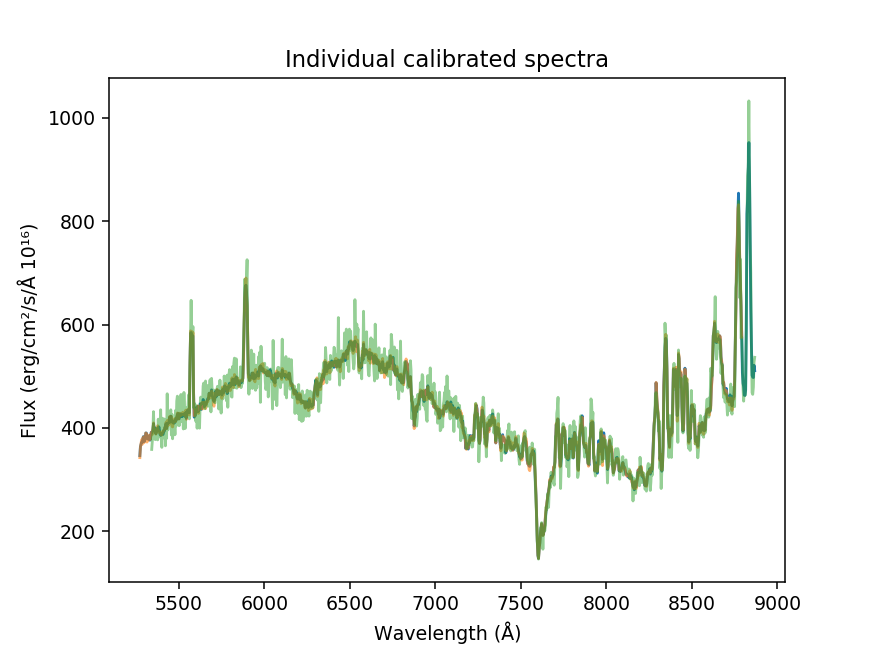

Text(0, 0.5, 'Flux (erg/cm²/s/Å 10¹⁶)')

In [21]:
#Importing and plotting the individual spectra

path2data = "/home/masi1109/Documents/PhD/ObsII/not2mattia/"

file1 = path2data + "ALAe130145_1dSpectrum_wav-flux-cal.txt"
lam1, flam1 = np.loadtxt(file1, unpack=True)

file2 = path2data + "ALAe130145_1dSpectrum_wav-flux-cal_mock1.txt"
lam2, flam2 = np.loadtxt(file2, unpack=True)

file3 = path2data + "ALAe130145_1dSpectrum_wav-flux-cal_mock2.txt"
lam3, flam3 = np.loadtxt(file3, unpack=True)

print(file1)
print("Number of wavelength values:", len(lam1), " Average separaion:", np.mean(np.diff(lam1)))
print("Minimum and maximum values:", min(lam1), max(lam1))
print("Mean, median, minimum and maximum flux values:", np.mean(flam1), np.median(flam1), min(flam1),\
      max(flam1), "\n")

print(file2)
print("Number of wavelength values:", len(lam2), " Average separaion:", np.mean(np.diff(lam2)))
print("Minimum and maximum values:", min(lam2), max(lam2))
print("Mean, median, minimum and maximum flux values:", np.mean(flam2), np.median(flam2), min(flam2),\
      max(flam2), "\n")

print(file3)
print("Number of wavelength values:", len(lam3), " Average separaion:", np.mean(np.diff(lam3))) 
print("Minimum and maximum values:", min(lam3), max(lam3))
print("Mean, median, minimum and maximum flux values:", np.mean(flam3), np.median(flam3), min(flam3),\
      max(flam3), "\n")

plt.figure()
plt.plot(lam1, flam1)
plt.plot(lam2, flam2, alpha=0.6)
plt.plot(lam3, flam3, alpha=0.5)
plt.title("Individual calibrated spectra")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (erg/cm²/s/Å 10¹⁶)")

# Create a common grid, resample and average the spectra

Now we can take the minimum and maximum values of wavelengths covered by all spectra for creating a common grid. The spectral resolution should be the same for all the individual spectra.

We then resample the individual spectra on the commond grid and finally average them together to obtain the coadded spectrum. We overplot below the final coadded spectrum on top of the individual ones and save it as a text file.

<IPython.core.display.Javascript object>


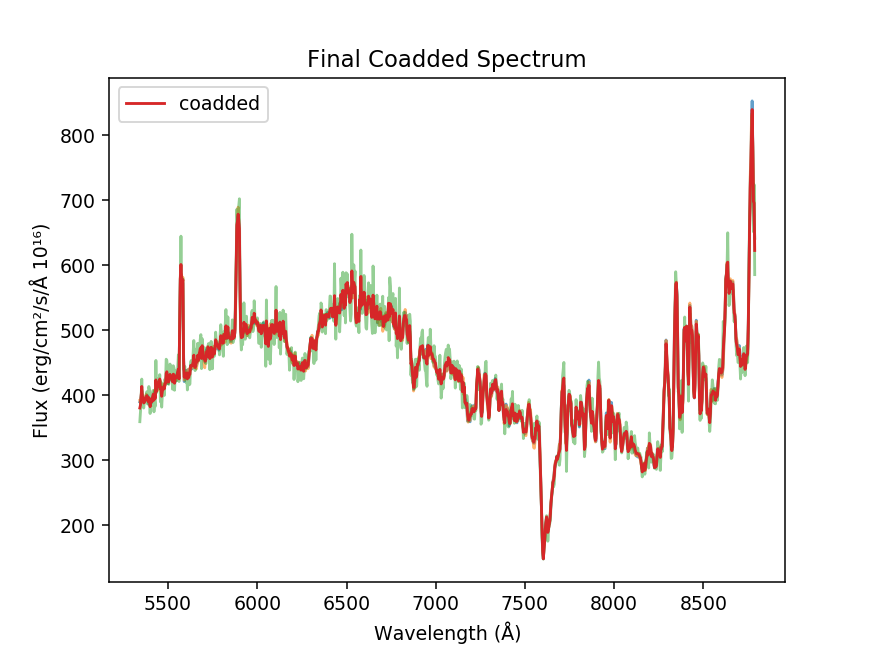

In [23]:
# Resampling and coaddition of individual spectra

# For resampling this I use a function defined in spectres.py by A. C. Carnall
# The argument of this function are: original wavelength array of the spectrum, 
# original flux array of the spectrum, new wavelength array desired

from spectres import spectres

# It is necessary, when using spectres.py, that the common grid is covered by all the spectra 
# that will be resampled onto it

lam_com = np.arange(5342, 8789, 3.6)

flam1_re = spectres(lam1, flam1, lam_com)
flam2_re = spectres(lam2, flam2, lam_com)
flam3_re = spectres(lam3, flam3, lam_com)

flam_coadd = (flam1_re + flam2_re + flam3_re) / 3

plt.figure()
plt.plot(lam_com, flam1_re, alpha=0.7)
plt.plot(lam_com, flam2_re, alpha=0.6)
plt.plot(lam_com, flam3_re, alpha=0.5)
plt.plot(lam_com, flam_coadd, label="coadded")
plt.title("Final Coadded Spectrum")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (erg/cm²/s/Å 10¹⁶)")
plt.legend()
plt.savefig("figs/SN_spectrum_wav-flux-cal_coadded.pdf")

# Saving the calibrated spectrum in a text file
file_out = open(path2data+"ALAe130145_1dSpectrum_wav-flux-cal_coadded.txt", "w")
file_out.write("# 1d final coadded spectrum obtained combining 3 individual spectra\n")
file_out.write('# Wavelength calibrated\n')
file_out.write('# Flux calibrated')
file_out.write("# Column 1: wavelength (Å)    Column 2: flux (erg/cm²/s/Å 10¹⁶)\n")

for i in range(len(lam_com)):
    s = '{:.4f}    {:.4f}\n'.format(lam_com[i], flam_coadd[i])
    file_out.write(s)
    
file_out.close()